In [1]:
#Import necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter


In [52]:
#Load the dataset
data = pd.read_csv('goodreads_data.csv')


In [53]:
data.head(10)


,Unnamed: 0,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL
0,0,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ...",4.27,"5,691,311",https://www.goodreads.com/book/show/2657.To_Ki...
1,1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,"9,278,135",https://www.goodreads.com/book/show/72193.Harr...
2,2,Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and...","['Classics', 'Fiction', 'Romance', 'Historical...",4.28,"3,944,155",https://www.goodreads.com/book/show/1885.Pride...
3,3,The Diary of a Young Girl,Anne Frank,Discovered in the attic in which she spent the...,"['Classics', 'Nonfiction', 'History', 'Biograp...",4.18,"3,488,438",https://www.goodreads.com/book/show/48855.The_...
4,4,Animal Farm,George Orwell,Librarian's note: There is an Alternate Cover ...,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",3.98,"3,575,172",https://www.goodreads.com/book/show/170448.Ani...
5,5,The Little Prince,Antoine de Saint-Exupéry,A pilot stranded in the desert awakes one morn...,"['Classics', 'Fiction', 'Fantasy', 'Childrens'...",4.32,"1,924,063",https://www.goodreads.com/book/show/157993.The...
6,6,1984,George Orwell,The new novel by George Orwell is the major wo...,"['Classics', 'Fiction', 'Science Fiction', 'Dy...",4.19,"4,201,429",https://www.goodreads.com/book/show/61439040-1984
7,7,The Great Gatsby,F. Scott Fitzgerald,Alternate Cover Edition ISBN: 0743273567 (ISBN...,"['Classics', 'Fiction', 'School', 'Historical ...",3.93,"4,839,642",https://www.goodreads.com/book/show/4671.The_G...
8,8,The Catcher in the Rye,J.D. Salinger,It's Christmas time and Holden Caulfield has j...,"['Classics', 'Fiction', 'Young Adult', 'Litera...",3.81,"3,315,881",https://www.goodreads.com/book/show/5107.The_C...
9,9,The Lord of the Rings,J.R.R. Tolkien,"One Ring to rule them all, One Ring to find th...","['Fantasy', 'Classics', 'Fiction', 'Adventure'...",4.52,"644,766",https://www.goodreads.com/book/show/33.The_Lor...


In [54]:
data.describe

<bound method NDFrame.describe of       Unnamed: 0                                               Book  \
0              0                              To Kill a Mockingbird   
1              1  Harry Potter and the Philosopher’s Stone (Harr...   
2              2                                Pride and Prejudice   
3              3                          The Diary of a Young Girl   
4              4                                        Animal Farm   
...          ...                                                ...   
9995        9995                    Breeders (Breeders Trilogy, #1)   
9996        9996                                             Dynamo   
9997        9997                              The Republic of Trees   
9998        9998                     Waking Up (Healing Hearts, #1)   
9999        9999                 Bits and Pieces: Tales and Sonnets   

                 Author                                        Description  \
0            Harper Lee  The unforg

In [56]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   10000 non-null  int64  
 1   Book         10000 non-null  object 
 2   Author       10000 non-null  object 
 3   Description  9923 non-null   object 
 4   Genres       10000 non-null  object 
 5   Avg_Rating   10000 non-null  float64
 6   Num_Ratings  10000 non-null  object 
 7   URL          10000 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 625.1+ KB


In [57]:
#number of missing values in each column
null_counts = data.isna().sum()

null_counts

Unnamed: 0      0
Book            0
Author          0
Description    77
Genres          0
Avg_Rating      0
Num_Ratings     0
URL             0
dtype: int64

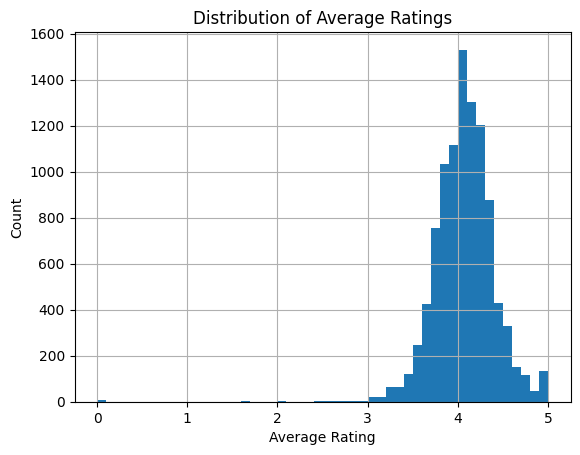

In [62]:
#histogram to visualize the distribution of the 'Avg_Rating'
data['Avg_Rating'].hist(bins=50)
plt.xlabel('Average Rating')
plt.ylabel('Count')
plt.title('Distribution of Average Ratings')
plt.show()

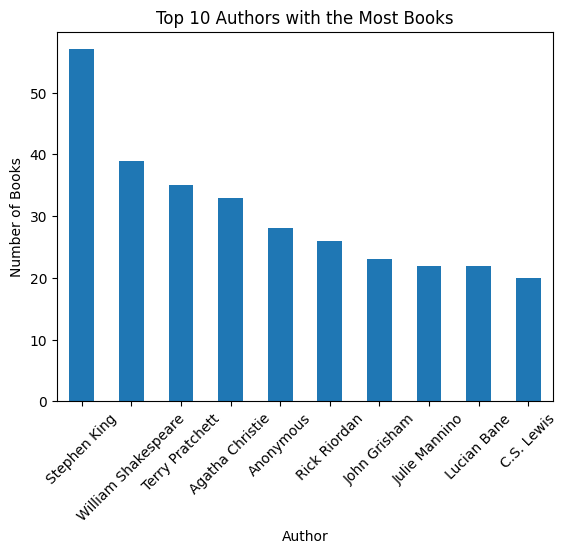

In [59]:
#bar chart showing the top 10 authors with the most books
data['Author'].value_counts().head(10).plot(kind='bar')
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.title('Top 10 Authors with the Most Books')
plt.xticks(rotation=45)
plt.show()

In [60]:
from ast import literal_eval

data['Genres'] = data['Genres'].apply(literal_eval)

all_genres = [genre for sublist in data['Genres'] for genre in sublist]

genre_counts = Counter(all_genres)

top_10_genres = dict(Counter(genre_counts).most_common(10))


In [63]:
#top 10 genres and the count
top_10_genres

{'Fiction': 5700,
 'Nonfiction': 2330,
 'Fantasy': 2195,
 'Classics': 2123,
 'Romance': 1558,
 'Young Adult': 1522,
 'Historical Fiction': 1481,
 'Mystery': 1357,
 'Contemporary': 1302,
 'Audiobook': 1242}

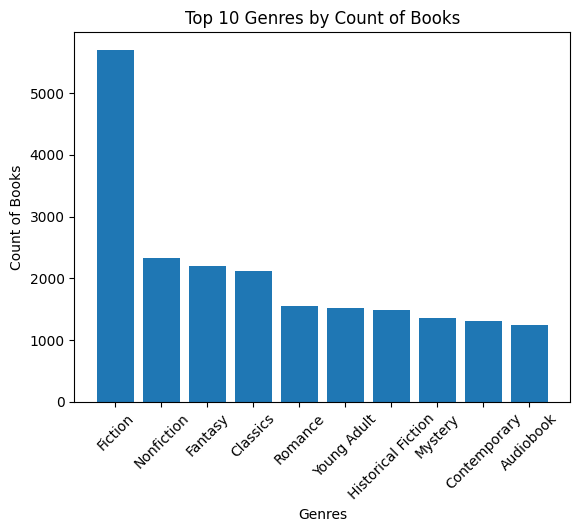

In [61]:
#bar chart for the top 10 genres based on the count of books
plt.figure()
plt.bar(top_10_genres.keys(), top_10_genres.values())
plt.xlabel('Genres')
plt.ylabel('Count of Books')
plt.title('Top 10 Genres by Count of Books')
plt.xticks(rotation=45)
plt.show()